In [33]:
import pickle
import matplotlib.pyplot as plt
import torch
import math
from scipy import stats
import numpy as np
import operator


%matplotlib inline
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
filename = "/Users/riccardoconci/Desktop/code/ZuckermanProject/Scatter_Plots_Decoders/Response_matrices.p"


Response_matrices = pickle.load( open( filename, "rb" ) ) 

[]


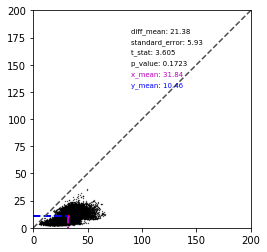

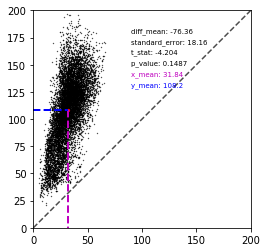

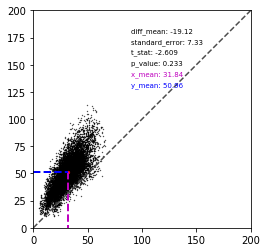

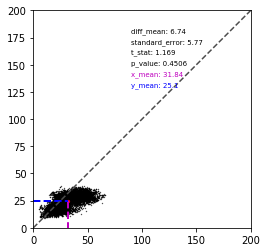

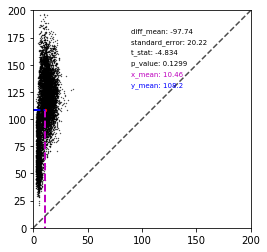

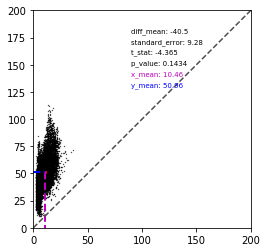

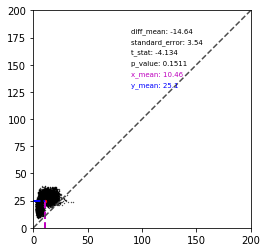

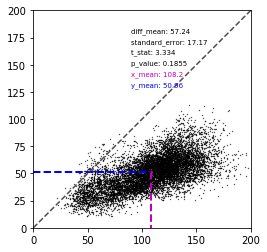

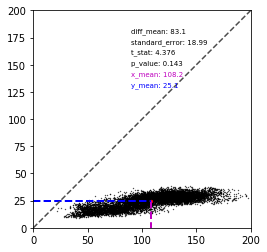

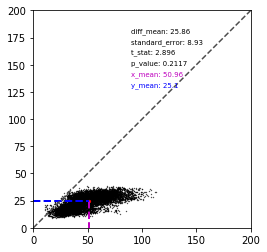

In [86]:
from itertools import combinations 

comb = combinations([0,1,2,3,4], 2) 
p_list = {}
for i,j in list(comb):
    mat1 = Response_matrices[i]
    mat2 = Response_matrices[j]
    #name = model_names[i]+"~"+ model_names[j]
    x_mean = float(torch.mean(mat1))
    y_mean = float(torch.mean(mat2))
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(mat1, mat2 ,s=0.1, c='black')
    ax.set_ylim(0,200)
    ax.set_xlim(0,200)
    ax.set_aspect('equal')
    ax.scatter(x_mean, y_mean, s=5, c='red')
    ax.plot([x_mean, x_mean],[y_mean, 0], 'm--',  linewidth=2 )
    ax.plot([0, x_mean],[y_mean, y_mean], 'b--',  linewidth=2 )    
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
        
    diff_vector = mat1 - mat2
    diff_mean = float(torch.mean(diff_vector))
    standard_dev = diff_vector.std(dim=0)
    standard_error = float(standard_dev/math.sqrt(2))
    t_test =   diff_mean/standard_error 
    t_test = float(t_test)
    p_value = stats.t.sf(np.abs(t_test), 1)*2
    
    
    ax.text(90, 180, 'diff_mean: {}'.format( np.round(diff_mean,2) ), fontsize=7)
    ax.text(90, 170, 'standard_error: {}'.format(np.round(standard_error,2)), fontsize=7)
    ax.text(90, 160, 't_stat: {}'.format(np.round(t_test,3)), fontsize=7)
    ax.text(90, 150, 'p_value: {}'.format(np.round(p_value,4)), fontsize=7)
    
    ax.text(90, 140, 'x_mean: {}'.format(np.round(x_mean,2)), fontsize=7, color='m')
    ax.text(90,130 , 'y_mean: {}'.format(np.round(y_mean,2)), fontsize=7, color='b')

    #plt.xlabel(model_names[i])
    #plt.ylabel(model_names[j])
    #plt.title(name + "Reconstruction errors")
    #plt.savefig("{}/{}".format(output_dir, name))
    
    

    #p_list[name] = p_value

sorted_p_list = sorted(p_list.items(), key=operator.itemgetter(1))
print(sorted_p_list)